# Week 4: Logistic Regression

## Agenda
- Logistic regression and ROC curves
- [Social bias in logistic regression](https://developers.perspectiveapi.com/s/about-the-api-model-cards?tabset-20254=3)

In [4]:
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_roc_curve

# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

In [3]:
# Load the digits dataset from https://www.openml.org/d/554
# use only 4s and 9s
X, Y = fetch_openml(name='mnist_784', return_X_y=True, cache=False)
X, Y = X[:1000], Y[:1000]
X = X / 255.0
indices = [i == '4' or i == '9' for i in Y]
features = X[indices]
targets = Y[indices]

# regression
x_train, x_test, y_train, y_test = train_test_split(features, targets, test_size=0.25)
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)

lr_model.score(x_test, y_test)


0.9423076923076923

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


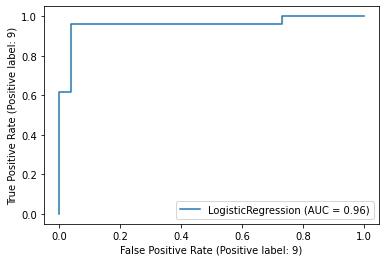

In [5]:
# The default threshold for classification is 0.5
# What if false positives are much worse than false negatives (or vice versa)?

plot_roc_curve(lr_model, x_test, y_test)